In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Mobile_Food_Facility_Permit.csv')

In [84]:
len(df.locationid.unique())

733

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 732
Data columns (total 24 columns):
locationid             733 non-null int64
Applicant              733 non-null object
FacilityType           727 non-null object
cnn                    733 non-null int64
LocationDescription    695 non-null object
Address                732 non-null object
blocklot               723 non-null object
block                  723 non-null object
lot                    723 non-null object
permit                 733 non-null object
Status                 733 non-null object
FoodItems              730 non-null object
X                      674 non-null float64
Y                      674 non-null float64
Latitude               674 non-null float64
Longitude              674 non-null float64
Schedule               733 non-null object
dayshours              704 non-null object
NOISent                4 non-null object
Approved               606 non-null object
Received               733 non-null

Dropping unnec colums.  Convert to DT

In [86]:
df.Status.unique()

array(['REQUESTED', 'SUSPEND', 'EXPIRED', 'APPROVED', 'INACTIVE'], dtype=object)

In [217]:
for colname in ['Received', 'ExpirationDate', 'Approved']:
    df[colname] = pd.to_datetime(df[colname])
# df.replace(['REQUESTED', 'SUSPEND', 'EXPIRED', 'APPROVED', 'INACTIVE']
# df.info()
df.groupby('Status').count()['Applicant']

Status
APPROVED     512
EXPIRED       90
INACTIVE       1
REQUESTED    126
SUSPEND        4
Name: Applicant, dtype: int64

In [88]:
df.drop(['X','Y', 'NOISent','locationid', 'cnn', 'LocationDescription', 'blocklot', 'block', 'lot', 'permit', 'Schedule'], axis = 1, inplace = True)
df.drop('dayshours', axis =  1, inplace = True)
df.drop('Location', axis = 1, inplace =True)

Things to explore:

number of open permits(not expired) at any point in time?
counts of food items per cart/truck

things to show:

dates/locations of new carts by lat/long

In [89]:
df.groupby('FacilityType').count()

,Applicant,Address,Status,FoodItems,Latitude,Longitude,Approved,Received,PriorPermit,ExpirationDate
FacilityType,,,,,,,,,,
Push Cart,69,69,69,69,66,66,43,69,69,52
Truck,657,656,657,654,601,601,562,657,657,616
Unknown,1,1,1,1,1,1,0,1,1,0


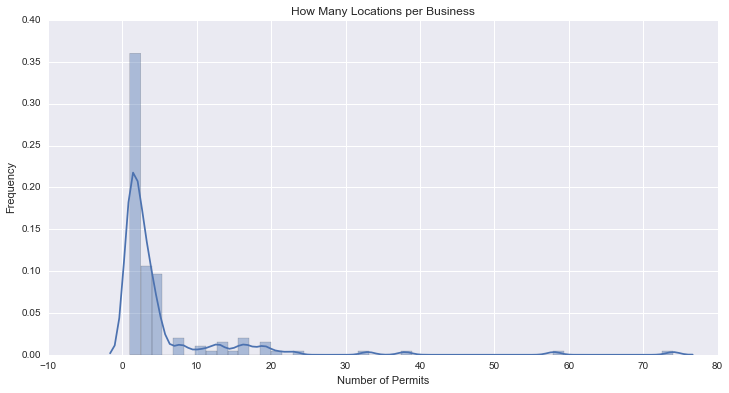

In [216]:
plt.figure(figsize=(12,6))
sns.distplot(df.groupby('Applicant').count()['Address'])
plt.xlabel('Number of Permits')
plt.ylabel('Frequency')
plt.title('How Many Locations per Business')
plt.show()

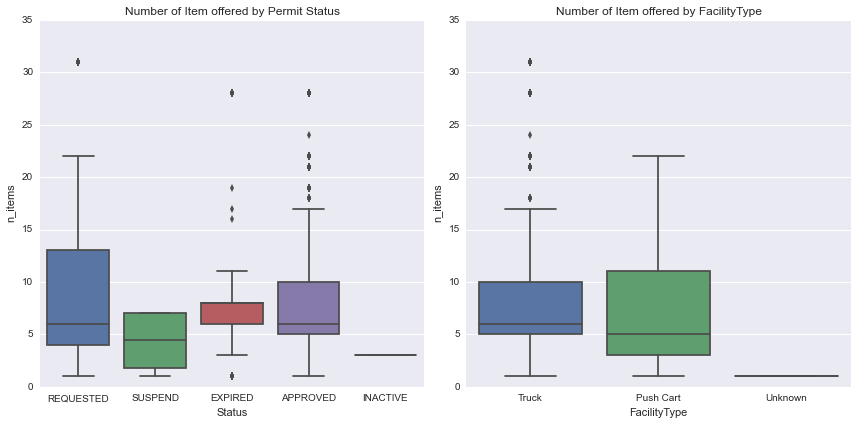

In [215]:
def item_counter(x):
    x = str(x)
#     print type(x)
    if str(x).count('.') > 1:
        x = x.replace('.', ':')
        x = x[:len(x)-1] 
    return len(x.split(':'))
df['n_items']= df['FoodItems'].apply(item_counter)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x='Status', y='n_items', data=df)
plt.title('Number of Item offered by Permit Status')
plt.subplot(1,2,2)
sns.boxplot(x='FacilityType', y='n_items', data=df)
plt.title('Number of Item offered by FacilityType')
plt.tight_layout()
plt.show()

In [212]:
df_copy = df.copy()
df_copy[df_copy['Received'].isnull()]
df_copy.set_index('Received', inplace=True, drop=False)
df_copy = df_copy[df_copy['Status'] == 'APPROVED']
df_copy['ones'] = 1
df_copy = df_copy.resample('M', how='sum')
df_copy.fillna(value=0, inplace=True)
# df_copy.head()

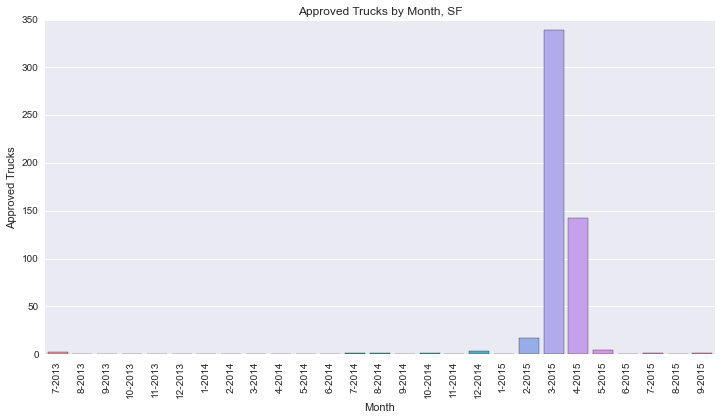

In [211]:

df_copy.fillna(value=0, inplace=True)
plt.figure(figsize=(12,6))
ax = sns.barplot(x=df_copy.index, y="ones", data=df_copy)
plt.xlabel('Month')
plt.ylabel('Approved Trucks')
x_labels = ['%s-%s' % (x.month, x.year) for x in df_copy.index.date]
plt.xticks(rotation=90)
ax.set_xticklabels(x_labels)
plt.title('Approved Trucks by Month, SF')
plt.show()

In [208]:
df_clean = df[df['FacilityType'].isin(['Push Cart', 'Truck'])] # remove unknown Facility Types (7 permits)
df_clean.head()

,Applicant,FacilityType,Address,Status,FoodItems,Latitude,Longitude,Approved,Received,PriorPermit,ExpirationDate,n_items
0,Bombay Blvd.,Truck,50 MAIN ST,REQUESTED,Indian Style: BBQ: Variety of Curries: Rice: W...,NaN,NaN,NaT,2011-03-07 16:11:00,0,NaT,14
1,Bombay Blvd.,Truck,333 MARKET ST,REQUESTED,Indian Style: BBQ: Variety of Curries: Rice: W...,37.791778,-122.397517,NaT,2011-03-07 16:11:00,0,NaT,14
2,Bombay Blvd.,Truck,561 MISSION ST,REQUESTED,Indian Style: BBQ: Variety of Curries: Rice: W...,NaN,NaN,NaT,2011-03-07 16:38:00,0,NaT,14
3,Bombay Blvd.,Truck,86 03RD ST,REQUESTED,Indian Style: BBQ: Variety of Curries: Rice: W...,37.786206,-122.402532,NaT,2011-03-07 16:38:00,0,NaT,14
4,Sausage Slinger,Push Cart,100 NEW MONTGOMERY ST,SUSPEND,Hot Dogs: Chips and Soda,37.787042,-122.400427,NaT,2011-04-11 11:15:00,0,2013-03-15,2


In [209]:
df_clean.to_csv('output_clean.csv')

http://bit.ly/1RffSLa